## Importing pandas

### Getting started and checking your pandas setup

Difficulty: *easy* 

**1.** Import pandas under the alias `pd`.

In [207]:
import pandas as pd

**2.** Print the version of pandas that has been imported.

In [208]:
pd.__version__

'2.1.4'

**3.** Print out all the *version* information of the libraries that are required by the pandas library.

In [209]:
pd.show_versions()


INSTALLED VERSIONS
------------------
commit              : a671b5a8bf5dd13fb19f0e88edc679bc9e15c673
python              : 3.11.5.final.0
python-bits         : 64
OS                  : Windows
OS-release          : 10
Version             : 10.0.26100
machine             : AMD64
processor           : Intel64 Family 6 Model 142 Stepping 12, GenuineIntel
byteorder           : little
LC_ALL              : None
LANG                : None
LOCALE              : English_United States.1252

pandas              : 2.1.4
numpy               : 1.26.4
pytz                : 2023.3.post1
dateutil            : 2.9.0.post0
setuptools          : 68.0.0
pip                 : 23.2.1
Cython              : None
pytest              : 7.4.0
hypothesis          : None
sphinx              : 5.0.2
blosc               : None
feather             : None
xlsxwriter          : None
lxml.etree          : 4.9.3
html5lib            : None
pymysql             : None
psycopg2            : None
jinja2              : 3.1.2


## DataFrame basics

### A few of the fundamental routines for selecting, sorting, adding and aggregating data in DataFrames

Difficulty: *easy*

Note: remember to import numpy using:
```python
import numpy as np
```

Consider the following Python dictionary `data` and Python list `labels`:

``` python
data = {'animal': ['cat', 'cat', 'snake', 'dog', 'dog', 'cat', 'snake', 'cat', 'dog', 'dog'],
        'age': [2.5, 3, 0.5, np.nan, 5, 2, 4.5, np.nan, 7, 3],
        'visits': [1, 3, 2, 3, 2, 3, 1, 1, 2, 1],
        'priority': ['yes', 'yes', 'no', 'yes', 'no', 'no', 'no', 'yes', 'no', 'no']}

labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']
```
(This is just some meaningless data I made up with the theme of animals and trips to a vet.)

**4.** Create a DataFrame `df` from this dictionary `data` which has the index `labels`.

In [210]:
import numpy as np
data = {'animal': ['cat', 'cat', 'snake', 'dog', 'dog', 'cat', 'snake', 'cat', 'dog', 'dog'],
        'age': [2.5, 3, 0.5, np.nan, 5, 2, 4.5, np.nan, 7, 3],
        'visits': [1, 3, 2, 3, 2, 3, 1, 1, 2, 1],
        'priority': ['yes', 'yes', 'no', 'yes', 'no', 'no', 'no', 'yes', 'no', 'no']}

labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']
df = pd.DataFrame(data,index=labels)
df

,animal,age,visits,priority
a,cat,2.5,1,yes
b,cat,3.0,3,yes
c,snake,0.5,2,no
d,dog,NaN,3,yes
e,dog,5.0,2,no
f,cat,2.0,3,no
g,snake,4.5,1,no
h,cat,NaN,1,yes
i,dog,7.0,2,no
j,dog,3.0,1,no


**5.** Display a summary of the basic information about this DataFrame and its data (*hint: there is a single method that can be called on the DataFrame*).

In [211]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, a to j
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   animal    10 non-null     object 
 1   age       8 non-null      float64
 2   visits    10 non-null     int64  
 3   priority  10 non-null     object 
dtypes: float64(1), int64(1), object(2)
memory usage: 400.0+ bytes


**6.** Return the first 3 rows of the DataFrame `df`.

In [212]:
df.head(3)

,animal,age,visits,priority
a,cat,2.5,1,yes
b,cat,3.0,3,yes
c,snake,0.5,2,no


**7.** Select just the 'animal' and 'age' columns from the DataFrame `df`.

In [213]:
df[['animal','age']]

,animal,age
a,cat,2.5
b,cat,3.0
c,snake,0.5
d,dog,NaN
e,dog,5.0
f,cat,2.0
g,snake,4.5
h,cat,NaN
i,dog,7.0
j,dog,3.0


**8.** Select the data in rows `[3, 4, 8]` *and* in columns `['animal', 'age']`.

In [214]:
print(df.loc[['c','d','h'], ['animal','age']])

  animal  age
c  snake  0.5
d    dog  NaN
h    cat  NaN


**9.** Select only the rows where the number of visits is greater than 3.

In [215]:
df[df['visits'] >= 3]

,animal,age,visits,priority
b,cat,3.0,3,yes
d,dog,NaN,3,yes
f,cat,2.0,3,no


**10.** Select the rows where the age is missing, i.e. it is `NaN`.

In [216]:
df[df['age'].isnull()]

,animal,age,visits,priority
d,dog,NaN,3,yes
h,cat,NaN,1,yes


**11.** Select the rows where the animal is a cat *and* the age is less than 3.

In [217]:
df1 = df[df['age'] < 3]
df1 = df1[df1['animal'] == 'cat']
df1

,animal,age,visits,priority
a,cat,2.5,1,yes
f,cat,2.0,3,no


**12.** Select the rows the age is between 2 and 4 (inclusive).

In [218]:
df[df['age'].between(2, 4, inclusive='both')]

,animal,age,visits,priority
a,cat,2.5,1,yes
b,cat,3.0,3,yes
f,cat,2.0,3,no
j,dog,3.0,1,no


**13.** Change the age in row 'f' to 1.5.

In [219]:
df.loc['f', 'age'] = 1.5
df

,animal,age,visits,priority
a,cat,2.5,1,yes
b,cat,3.0,3,yes
c,snake,0.5,2,no
d,dog,NaN,3,yes
e,dog,5.0,2,no
f,cat,1.5,3,no
g,snake,4.5,1,no
h,cat,NaN,1,yes
i,dog,7.0,2,no
j,dog,3.0,1,no


**14.** Calculate the sum of all visits in `df` (i.e. find the total number of visits).

In [220]:
total_visits = df['visits'].sum()
total_visits

19

**15.** Calculate the mean age for each different animal in `df`.

In [221]:
df.groupby('animal')['age'].mean()

animal
cat      2.333333
dog      5.000000
snake    2.500000
Name: age, dtype: float64

**16.** Append a new row 'k' to `df` with your choice of values for each column. Then delete that row to return the original DataFrame.

In [222]:
    df.loc['k'] = ['snake',4,2, 'no']
    print("\nDataFrame after appending row 'k':")
    print(df)


DataFrame after appending row 'k':
  animal  age  visits priority
a    cat  2.5       1      yes
b    cat  3.0       3      yes
c  snake  0.5       2       no
d    dog  NaN       3      yes
e    dog  5.0       2       no
f    cat  1.5       3       no
g  snake  4.5       1       no
h    cat  NaN       1      yes
i    dog  7.0       2       no
j    dog  3.0       1       no
k  snake  4.0       2       no


In [223]:
df = df.drop('k', axis=0)
df

,animal,age,visits,priority
a,cat,2.5,1,yes
b,cat,3.0,3,yes
c,snake,0.5,2,no
d,dog,NaN,3,yes
e,dog,5.0,2,no
f,cat,1.5,3,no
g,snake,4.5,1,no
h,cat,NaN,1,yes
i,dog,7.0,2,no
j,dog,3.0,1,no


**17.** Count the number of each type of animal in `df`.

In [224]:
df['animal'].value_counts()

animal
cat      4
dog      4
snake    2
Name: count, dtype: int64

**18.** Sort `df` first by the values in the 'age' in *decending* order, then by the value in the 'visits' column in *ascending* order (so row `i` should be first, and row `d` should be last).

In [225]:
df_sorted = df.sort_values(by=['age', 'visits'], ascending=[False, True])

df_sorted

,animal,age,visits,priority
i,dog,7.0,2,no
e,dog,5.0,2,no
g,snake,4.5,1,no
j,dog,3.0,1,no
b,cat,3.0,3,yes
a,cat,2.5,1,yes
f,cat,1.5,3,no
c,snake,0.5,2,no
h,cat,NaN,1,yes
d,dog,NaN,3,yes


**19.** The 'priority' column contains the values 'yes' and 'no'. Replace this column with a column of boolean values: 'yes' should be `True` and 'no' should be `False`.

In [226]:
df['priority'] = df['priority'].map(
                   {'yes':True ,'no':False})

In [227]:
df

,animal,age,visits,priority
a,cat,2.5,1,True
b,cat,3.0,3,True
c,snake,0.5,2,False
d,dog,NaN,3,True
e,dog,5.0,2,False
f,cat,1.5,3,False
g,snake,4.5,1,False
h,cat,NaN,1,True
i,dog,7.0,2,False
j,dog,3.0,1,False


**20.** In the 'animal' column, change the 'snake' entries to 'python'.

In [228]:
df['animal'].replace('snake','python')

a       cat
b       cat
c    python
d       dog
e       dog
f       cat
g    python
h       cat
i       dog
j       dog
Name: animal, dtype: object

In [229]:
df

,animal,age,visits,priority
a,cat,2.5,1,True
b,cat,3.0,3,True
c,snake,0.5,2,False
d,dog,NaN,3,True
e,dog,5.0,2,False
f,cat,1.5,3,False
g,snake,4.5,1,False
h,cat,NaN,1,True
i,dog,7.0,2,False
j,dog,3.0,1,False


**21.** For each animal type and each number of visits, find the mean age. In other words, each row is an animal, each column is a number of visits and the values are the mean ages (*hint: use a pivot table*).

In [230]:
pivot_table = df.pivot_table(index='animal', columns='visits', values='age', aggfunc=np.mean)
pivot_table

C:\Users\DELL\AppData\Local\Temp\ipykernel_7880\4078553712.py:1: FutureWarning: The provided callable <function mean at 0x00000213307509A0> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  pivot_table = df.pivot_table(index='animal', columns='visits', values='age', aggfunc=np.mean)


visits,1,2,3
animal,,,
cat,2.5,NaN,2.25
dog,3.0,6.0,NaN
snake,4.5,0.5,NaN


## DataFrames: beyond the basics

### Slightly trickier: you may need to combine two or more methods to get the right answer

Difficulty: *medium*

The previous section was tour through some basic but essential DataFrame operations. Below are some ways that you might need to cut your data, but for which there is no single "out of the box" method.

**22.** You have a DataFrame `df` with a column 'A' of integers. For example:
```python
df = pd.DataFrame({'A': [1, 2, 2, 3, 4, 5, 5, 5, 6, 7, 7]})
```

How do you filter out rows which contain the same integer as the row immediately above?

You should be left with a column containing the following values:

```python
1, 2, 3, 4, 5, 6, 7
```

In [256]:
df = pd.DataFrame({'A': [1, 2, 2, 3, 4, 5, 5, 5, 6, 7, 7]})
df

,A
0,1
1,2
2,2
3,3
4,4
5,5
6,5
7,5
8,6
9,7


**23.** Given a DataFrame of numeric values, say
```python
df = pd.DataFrame(np.random.random(size=(5, 3))) # a 5x3 frame of float values
```

how do you subtract the row mean from each element in the row?

In [261]:
df = pd.DataFrame(np.random.random(size=(5, 3))) 
means = df.mean(axis=1)
df_centered = df.sub(means, axis=0)
df_centered

,0,1,2
0,0.158317,-0.422958,0.264641
1,0.209347,-0.042453,-0.166895
2,0.047171,-0.152878,0.105707
3,-0.141899,0.059719,0.082180
4,0.423583,-0.060492,-0.363091


**24.** Suppose you have DataFrame with 10 columns of real numbers, for example:

```python
df = pd.DataFrame(np.random.random(size=(5, 10)), columns=list('abcdefghij'))
```
Which column of numbers has the smallest sum?  Return that column's label.

In [280]:
df = pd.DataFrame(np.random.random(size=(5, 10)), columns=list('abcdefghij'))
sums = df.sum()
print(sums.idxmin(), sums.min())

j 1.422490021555658


**25.** How do you count how many unique rows a DataFrame has (i.e. ignore all rows that are duplicates)? As input, use a DataFrame of zeros and ones with 10 rows and 3 columns.

```python
df = pd.DataFrame(np.random.randint(0, 2, size=(10, 3)))
```

In [285]:
df = pd.DataFrame(np.random.randint(0, 2, size=(10, 3)))
df.drop_duplicates()

,0,1,2
0,0,1,0
2,1,0,1
3,0,0,1
4,0,1,1
5,1,1,0
9,1,0,0


The next three puzzles are slightly harder.


**26.** In the cell below, you have a DataFrame `df` that consists of 10 columns of floating-point numbers. Exactly 5 entries in each row are NaN values. 

For each row of the DataFrame, find the *column* which contains the *third* NaN value.

You should return a Series of column labels: `e, c, d, h, d`

In [289]:
data = [[0.04, np.nan, np.nan, 0.25, np.nan, 0.43, 0.71, 0.51, np.nan, np.nan],
        [np.nan, np.nan, np.nan, 0.04, 0.76, np.nan, np.nan, 0.67, 0.76, 0.16],
        [np.nan, np.nan, 0.5 , np.nan, 0.31, 0.4 , np.nan, np.nan, 0.24, 0.01],
        [0.49, np.nan, np.nan, 0.62, 0.73, 0.26, 0.85, np.nan, np.nan, np.nan],
        [np.nan, np.nan, 0.41, np.nan, 0.05, np.nan, 0.61, np.nan, 0.48, 0.68]]
columns = list('abcdefghij')
df = pd.DataFrame(data, columns=columns)
print(df)
def find_third_nan_column(row):
    nan_indices = row.index[row.isnull()].tolist()
    
    return nan_indices[2] if len(nan_indices) >= 3 else None

result = df.apply(find_third_nan_column, axis=1)
print(list(result))

      a   b     c     d     e     f     g     h     i     j
0  0.04 NaN   NaN  0.25   NaN  0.43  0.71  0.51   NaN   NaN
1   NaN NaN   NaN  0.04  0.76   NaN   NaN  0.67  0.76  0.16
2   NaN NaN  0.50   NaN  0.31  0.40   NaN   NaN  0.24  0.01
3  0.49 NaN   NaN  0.62  0.73  0.26  0.85   NaN   NaN   NaN
4   NaN NaN  0.41   NaN  0.05   NaN  0.61   NaN  0.48  0.68
['e', 'c', 'd', 'h', 'd']


**27.** A DataFrame has a column of groups 'grps' and and column of integer values 'vals': 

```python
df = pd.DataFrame({'grps': list('aaabbcaabcccbbc'), 
                   'vals': [12,345,3,1,45,14,4,52,54,23,235,21,57,3,87]})
```
For each *group*, find the sum of the three greatest values. You should end up with the answer as follows:
```
grps
a    409
b    156
c    345
```

In [291]:
df = pd.DataFrame({'grps': list('aaabbcaabcccbbc'), 
                   'vals': [12,345,3,1,45,14,4,52,54,23,235,21,57,3,87]})
result = (
    df
    .sort_values('vals', ascending=False)
    .groupby('grps')
    .head(3)
    .groupby('grps')['vals']
    .sum()
)

print(result)

grps
a    409
b    156
c    345
Name: vals, dtype: int64


**28.** The DataFrame `df` constructed below has two integer columns 'A' and 'B'. The values in 'A' are between 1 and 100 (inclusive). 

For each group of 10 consecutive integers in 'A' (i.e. `(0, 10]`, `(10, 20]`, ...), calculate the sum of the corresponding values in column 'B'.

The answer should be a Series as follows:

```
A
(0, 10]      635
(10, 20]     360
(20, 30]     315
(30, 40]     306
(40, 50]     750
(50, 60]     284
(60, 70]     424
(70, 80]     526
(80, 90]     835
(90, 100]    852
```

In [295]:
np.random.seed(0)
df = pd.DataFrame({
    'A': np.random.randint(1, 101, size=100),
    'B': np.random.randint(1, 20, size=100)
})

bins = pd.cut(df['A'], bins=range(0, 101, 10))
result = df.groupby(bins)['B'].sum()

result


C:\Users\DELL\AppData\Local\Temp\ipykernel_7880\2986031246.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  result = df.groupby(bins)['B'].sum()


A
(0, 10]       86
(10, 20]     100
(20, 30]     100
(30, 40]     162
(40, 50]     128
(50, 60]      84
(60, 70]      99
(70, 80]      73
(80, 90]     101
(90, 100]     30
Name: B, dtype: int32

## DataFrames: harder problems 

### These might require a bit of thinking outside the box...

...but all are solvable using just the usual pandas/NumPy methods (and so avoid using explicit `for` loops).

Difficulty: *hard*

**29.** Consider a DataFrame `df` where there is an integer column 'X':
```python
df = pd.DataFrame({'X': [7, 2, 0, 3, 4, 2, 5, 0, 3, 4]})
```
For each value, count the difference back to the previous zero (or the start of the Series, whichever is closer). These values should therefore be 

```
[1, 2, 0, 1, 2, 3, 4, 0, 1, 2]
```

Make this a new column 'Y'.

In [330]:
df = pd.DataFrame({'X': [7, 2, 0, 3, 4, 2, 5, 0, 3, 4]})

result = []
last_zero_index = -1

for i, val in enumerate(df['X']):
    if val == 0:
        last_zero_index = i
        result.append(0)
    else:
        result.append(i - last_zero_index)

df['Y'] = result

print(df)

   X  Y
0  7  1
1  2  2
2  0  0
3  3  1
4  4  2
5  2  3
6  5  4
7  0  0
8  3  1
9  4  2


**30.** Consider the DataFrame constructed below which contains rows and columns of numerical data. 

Create a list of the column-row index locations of the 3 largest values in this DataFrame. In this case, the answer should be:
```
[(5, 7), (6, 4), (2, 5)]
```

In [334]:
s = np.argsort(df.values, axis=None)[::-1][:3]
labels = np.unravel_index(s, df.shape)
labels = list(zip(*labels))

print(labels) 

[(0, 0), (6, 0), (9, 0)]


**31.** You are given the DataFrame below with a column of group IDs, 'grps', and a column of corresponding integer values, 'vals'.

```python
df = pd.DataFrame({"vals": np.random.RandomState(31).randint(-30, 30, size=15), 
                   "grps": np.random.RandomState(31).choice(["A", "B"], 15)})
```

Create a new column 'patched_values' which contains the same values as the 'vals' any negative values in 'vals' with the group mean:

```
    vals grps  patched_vals
0    -12    A          13.6
1     -7    B          28.0
2    -14    A          13.6
3      4    A           4.0
4     -7    A          13.6
5     28    B          28.0
6     -2    A          13.6
7     -1    A          13.6
8      8    A           8.0
9     -2    B          28.0
10    28    A          28.0
11    12    A          12.0
12    16    A          16.0
13   -24    A          13.6
14   -12    A          13.6
```

In [352]:
df = pd.DataFrame({"vals": np.random.RandomState(31).randint(-30, 30, size=15), 
                   "grps": np.random.RandomState(31).choice(["A", "B"], 15)})
group_means = df.groupby('grps')['vals'].transform('mean')
df['patched_values'] = df['vals']
df.loc[df['vals'] < 0, 'patched_values'] = round(group_means)
df

,vals,grps,patched_values
0,-12,A,0
1,-7,B,6
2,-14,A,0
3,4,A,4
4,-7,A,0
5,28,B,28
6,-2,A,0
7,-1,A,0
8,8,A,8
9,-2,B,6


**32.** Implement a rolling mean over groups with window size 3, which ignores NaN value. For example consider the following DataFrame:

```python
>>> df = pd.DataFrame({'group': list('aabbabbbabab'),
                       'value': [1, 2, 3, np.nan, 2, 3, np.nan, 1, 7, 3, np.nan, 8]})
>>> df
   group  value
0      a    1.0
1      a    2.0
2      b    3.0
3      b    NaN
4      a    2.0
5      b    3.0
6      b    NaN
7      b    1.0
8      a    7.0
9      b    3.0
10     a    NaN
11     b    8.0
```
The goal is to compute the Series:

```
0     1.000000
1     1.500000
2     3.000000
3     3.000000
4     1.666667
5     3.000000
6     3.000000
7     2.000000
8     3.666667
9     2.000000
10    4.500000
11    4.000000
```
E.g. the first window of size three for group 'b' has values 3.0, NaN and 3.0 and occurs at row index 5. Instead of being NaN the value in the new column at this row index should be 3.0 (just the two non-NaN values are used to compute the mean (3+3)/2)

In [358]:
df = pd.DataFrame({'group': list('aabbabbbabab'),
                       'value': [1, 2, 3, np.nan, 2, 3, np.nan, 1, 7, 3, np.nan, 8]})
df['res'] = df['value'].rolling(3, min_periods=0, center=True).mean()
df

,group,value,res
0,a,1.0,1.500000
1,a,2.0,2.000000
2,b,3.0,2.500000
3,b,NaN,2.500000
4,a,2.0,2.500000
5,b,3.0,2.500000
6,b,NaN,2.000000
7,b,1.0,4.000000
8,a,7.0,3.666667
9,b,3.0,5.000000


## Series and DatetimeIndex

### Exercises for creating and manipulating Series with datetime data

Difficulty: *easy/medium*

pandas is fantastic for working with dates and times. These puzzles explore some of this functionality.


**33.** Create a DatetimeIndex that contains each business day of 2015 and use it to index a Series of random numbers. Let's call this Series `s`.

In [376]:
d = pd.date_range('2015-01-01', '2015-12-31', freq='B')
s = {'s':np.random.randint(1,99,(len(d)))}
df = pd.DataFrame(s,index=d)
df

,s
2015-01-01,93
2015-01-02,66
2015-01-05,86
2015-01-06,67
2015-01-07,33
...,...
2015-12-25,92
2015-12-28,44
2015-12-29,55
2015-12-30,48


**34.** Find the sum of the values in `s` for every Wednesday.

In [377]:
df[df.index.dayofweek==2]['s'].sum()

2400

**35.** For each calendar month in `s`, find the mean of values.

In [381]:
df.groupby([df.index.month])['s'].sum()

1     1250
2     1039
3     1204
4     1048
5     1088
6     1048
7     1072
8     1257
9      868
10    1013
11    1154
12    1301
Name: s, dtype: int32

**36.** For each group of four consecutive calendar months in `s`, find the date on which the highest value occurred.

In [389]:
def find_max(df):
    results = []
    for i in range(12):
        start_month = (i % 12) + 1
        end_month = ((i + 3) % 12) + 1

        if start_month <= end_month:
            group_df = df[(df.index.month >= start_month) & (df.index.month <= end_month)]
        else:
            group_df = df[(df.index.month >= start_month) | (df.index.month <= end_month)]

        if not group_df.empty:
            max_date = group_df['s'].idxmax()
            results.append({'start_month': start_month, 'end_month': end_month, 'max_date': max_date, 'max_value': group_df['s'].max()})
    return pd.DataFrame(results)
print(find_max(df))

    start_month  end_month   max_date  max_value
0             1          4 2015-03-19         98
1             2          5 2015-03-19         98
2             3          6 2015-03-19         98
3             4          7 2015-05-05         96
4             5          8 2015-05-05         96
5             6          9 2015-06-08         96
6             7         10 2015-10-15         98
7             8         11 2015-10-15         98
8             9         12 2015-10-15         98
9            10          1 2015-10-15         98
10           11          2 2015-02-18         97
11           12          3 2015-03-19         98


**37.** Create a DateTimeIndex consisting of the third Thursday in each month for the years 2015 and 2016.

In [385]:
d = pd.date_range('2015-01-01', '2016-12-31', freq='WOM-3THU')
d

DatetimeIndex(['2015-01-15', '2015-02-19', '2015-03-19', '2015-04-16',
               '2015-05-21', '2015-06-18', '2015-07-16', '2015-08-20',
               '2015-09-17', '2015-10-15', '2015-11-19', '2015-12-17',
               '2016-01-21', '2016-02-18', '2016-03-17', '2016-04-21',
               '2016-05-19', '2016-06-16', '2016-07-21', '2016-08-18',
               '2016-09-15', '2016-10-20', '2016-11-17', '2016-12-15'],
              dtype='datetime64[ns]', freq='WOM-3THU')

## Cleaning Data

### Making a DataFrame easier to work with

Difficulty: *easy/medium*

It happens all the time: someone gives you data containing malformed strings, Python, lists and missing data. How do you tidy it up so you can get on with the analysis?

Take this monstrosity as the DataFrame to use in the following puzzles:

```python
df = pd.DataFrame({'From_To': ['LoNDon_paris', 'MAdrid_miLAN', 'londON_StockhOlm', 
                               'Budapest_PaRis', 'Brussels_londOn'],
              'FlightNumber': [10045, np.nan, 10065, np.nan, 10085],
              'RecentDelays': [[23, 47], [], [24, 43, 87], [13], [67, 32]],
                   'Airline': ['KLM(!)', '<Air France> (12)', '(British Airways. )', 
                               '12. Air France', '"Swiss Air"']})
```
Formatted, it looks like this:

```
            From_To  FlightNumber  RecentDelays              Airline
0      LoNDon_paris       10045.0      [23, 47]               KLM(!)
1      MAdrid_miLAN           NaN            []    <Air France> (12)
2  londON_StockhOlm       10065.0  [24, 43, 87]  (British Airways. )
3    Budapest_PaRis           NaN          [13]       12. Air France
4   Brussels_londOn       10085.0      [67, 32]          "Swiss Air"
```


(It's some flight data I made up; it's not meant to be accurate in any way.)


**38.** Some values in the the **FlightNumber** column are missing (they are `NaN`). These numbers are meant to increase by 10 with each row so 10055 and 10075 need to be put in place. Modify `df` to fill in these missing numbers and make the column an integer column (instead of a float column).

In [391]:

df = pd.DataFrame({'From_To': ['LoNDon_paris', 'MAdrid_miLAN', 'londON_StockhOlm', 
                               'Budapest_PaRis', 'Brussels_londOn'],
              'FlightNumber': [10045, np.nan, 10065, np.nan, 10085],
              'RecentDelays': [[23, 47], [], [24, 43, 87], [13], [67, 32]],
                   'Airline': ['KLM(!)', '<Air France> (12)', '(British Airways. )', 
                               '12. Air France', '"Swiss Air"']})
df

,From_To,FlightNumber,RecentDelays,Airline
0,LoNDon_paris,10045.0,"[23, 47]",KLM(!)
1,MAdrid_miLAN,NaN,[],<Air France> (12)
2,londON_StockhOlm,10065.0,"[24, 43, 87]",(British Airways. )
3,Budapest_PaRis,NaN,[13],12. Air France
4,Brussels_londOn,10085.0,"[67, 32]","""Swiss Air"""


**39.** The **From\_To** column would be better as two separate columns! Split each string on the underscore delimiter `_` to give a new temporary DataFrame called 'temp' with the correct values. Assign the correct column names 'From' and 'To' to this temporary DataFrame. 

In [392]:
from copy import copy
temp = df.copy()
temp[['From', 'To']] = df['From_To'].str.split('_', expand=True)
temp

,From_To,FlightNumber,RecentDelays,Airline,From,To
0,LoNDon_paris,10045.0,"[23, 47]",KLM(!),LoNDon,paris
1,MAdrid_miLAN,NaN,[],<Air France> (12),MAdrid,miLAN
2,londON_StockhOlm,10065.0,"[24, 43, 87]",(British Airways. ),londON,StockhOlm
3,Budapest_PaRis,NaN,[13],12. Air France,Budapest,PaRis
4,Brussels_londOn,10085.0,"[67, 32]","""Swiss Air""",Brussels,londOn


**40.** Notice how the capitalisation of the city names is all mixed up in this temporary DataFrame 'temp'. Standardise the strings so that only the first letter is uppercase (e.g. "londON" should become "London".)

In [393]:
temp['From'] = temp['From'].str.capitalize()
temp['To'] = temp['To'].str.capitalize()
temp

,From_To,FlightNumber,RecentDelays,Airline,From,To
0,LoNDon_paris,10045.0,"[23, 47]",KLM(!),London,Paris
1,MAdrid_miLAN,NaN,[],<Air France> (12),Madrid,Milan
2,londON_StockhOlm,10065.0,"[24, 43, 87]",(British Airways. ),London,Stockholm
3,Budapest_PaRis,NaN,[13],12. Air France,Budapest,Paris
4,Brussels_londOn,10085.0,"[67, 32]","""Swiss Air""",Brussels,London


**41.** Delete the **From_To** column from `df` and attach the temporary DataFrame 'temp' from the previous questions.

In [394]:
df.drop(columns=['From_To'],inplace=True)
df


,FlightNumber,RecentDelays,Airline
0,10045.0,"[23, 47]",KLM(!)
1,NaN,[],<Air France> (12)
2,10065.0,"[24, 43, 87]",(British Airways. )
3,NaN,[13],12. Air France
4,10085.0,"[67, 32]","""Swiss Air"""


In [395]:
df['From'] = temp['From']
df['To'] = temp['To']
df

,FlightNumber,RecentDelays,Airline,From,To
0,10045.0,"[23, 47]",KLM(!),London,Paris
1,NaN,[],<Air France> (12),Madrid,Milan
2,10065.0,"[24, 43, 87]",(British Airways. ),London,Stockholm
3,NaN,[13],12. Air France,Budapest,Paris
4,10085.0,"[67, 32]","""Swiss Air""",Brussels,London


**42**. In the **Airline** column, you can see some extra puctuation and symbols have appeared around the airline names. Pull out just the airline name. E.g. `'(British Airways. )'` should become `'British Airways'`.

In [396]:
import re
pattern = r'[^\w\s]'

df['Airline'] = df['Airline'].str.replace(pattern, '', regex=True)
df

,FlightNumber,RecentDelays,Airline,From,To
0,10045.0,"[23, 47]",KLM,London,Paris
1,NaN,[],Air France 12,Madrid,Milan
2,10065.0,"[24, 43, 87]",British Airways,London,Stockholm
3,NaN,[13],12 Air France,Budapest,Paris
4,10085.0,"[67, 32]",Swiss Air,Brussels,London


**43**. In the RecentDelays column, the values have been entered into the DataFrame as a list. We would like each first value in its own column, each second value in its own column, and so on. If there isn't an Nth value, the value should be NaN.

Expand the Series of lists into a DataFrame named `delays`, rename the columns `delay_1`, `delay_2`, etc. and replace the unwanted RecentDelays column in `df` with `delays`.

In [401]:
delays = df['RecentDelays'].apply(pd.Series)

delays = delays.rename(columns=lambda x: f'delay_{x+1}')

df_new = pd.concat([df.drop('RecentDelays', axis=1), delays], axis=1)
df_new

,FlightNumber,Airline,From,To,delay_1,delay_2,delay_3
0,10045.0,KLM,London,Paris,23.0,47.0,NaN
1,NaN,Air France 12,Madrid,Milan,NaN,NaN,NaN
2,10065.0,British Airways,London,Stockholm,24.0,43.0,87.0
3,NaN,12 Air France,Budapest,Paris,13.0,NaN,NaN
4,10085.0,Swiss Air,Brussels,London,67.0,32.0,NaN


The DataFrame should look much better now.
```
   FlightNumber          Airline      From         To  delay_1  delay_2  delay_3
0         10045              KLM    London      Paris     23.0     47.0      NaN
1         10055       Air France    Madrid      Milan      NaN      NaN      NaN
2         10065  British Airways    London  Stockholm     24.0     43.0     87.0
3         10075       Air France  Budapest      Paris     13.0      NaN      NaN
4         10085        Swiss Air  Brussels     London     67.0     32.0      NaN
```

## Using MultiIndexes

### Go beyond flat DataFrames with additional index levels

Difficulty: *medium*

Previous exercises have seen us analysing data from DataFrames equipped with a single index level. However, pandas also gives you the possibilty of indexing your data using *multiple* levels. This is very much like adding new dimensions to a Series or a DataFrame. For example, a Series is 1D, but by using a MultiIndex with 2 levels we gain of much the same functionality as a 2D DataFrame.

The set of puzzles below explores how you might use multiple index levels to enhance data analysis.

To warm up, we'll look make a Series with two index levels. 

**44**. Given the lists `letters = ['A', 'B', 'C']` and `numbers = list(range(10))`, construct a MultiIndex object from the product of the two lists. Use it to index a Series of random numbers. Call this Series `s`.

In [431]:
import random
letters = ['A', 'B', 'C']
numbers = list(range(10))
print(numbers)
index=pd.MultiIndex.from_product([letters, numbers], names=['letters','num'])
s = pd.Series([random.randint(1,99) for i in range(30)],index)
print (s)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
letters  num
A        0      80
         1      36
         2      76
         3      70
         4      66
         5      69
         6       4
         7      92
         8      63
         9      39
B        0      10
         1       9
         2      75
         3      40
         4      53
         5       8
         6      83
         7      66
         8      44
         9      99
C        0      30
         1      13
         2      90
         3      84
         4      16
         5      20
         6      67
         7      91
         8      11
         9      14
dtype: int64


**45.** Check the index of `s` is lexicographically sorted (this is a necessary proprty for indexing to work correctly with a MultiIndex).

In [436]:
index.is_lexsorted()

AttributeError: 'MultiIndex' object has no attribute 'is_lexsorted'

**46**. Select the labels `1`, `3` and `6` from the second level of the MultiIndexed Series.

In [449]:
s.loc[('B',1)], s.loc[('B',3)], s.loc[('B',6)]

(9, 40, 83)

**47**. Slice the Series `s`; slice up to label 'B' for the first level and from label 5 onwards for the second level.

In [460]:
s.loc[:'B',5:]

letters  num
A        5      69
         6       4
         7      92
         8      63
         9      39
B        5       8
         6      83
         7      66
         8      44
         9      99
dtype: int64

**48**. Sum the values in `s` for each label in the first level (you should have Series giving you a total for labels A, B and C).

In [464]:
s.groupby(level="letters").sum()

letters
A    595
B    487
C    436
dtype: int64

**49**. Suppose that `sum()` (and other methods) did not accept a `level` keyword argument. How else could you perform the equivalent of `s.sum(level=1)`?

In [475]:
labels = s.index.get_level_values(0).unique()
labels
sums = {}

for label in labels:
    x = s.loc[label]
    total = 0
    for value in x:
        total += value

    sums[label] = total

sums

{'A': 595, 'B': 487, 'C': 436}

**50**. Exchange the levels of the MultiIndex so we have an index of the form (letters, numbers). Is this new Series properly lexsorted? If not, sort it.

In [482]:
index=index.swaplevel('letters', 'num')
s = pd.Series([random.randint(1,99) for i in range(30)],index)
s

num  letters
0    A          10
1    A          68
2    A          72
3    A          65
4    A          70
5    A          83
6    A          63
7    A          28
8    A          31
9    A          26
0    B           4
1    B          16
2    B          53
3    B           2
4    B          50
5    B          95
6    B          62
7    B          83
8    B           3
9    B          13
0    C          88
1    C          13
2    C           9
3    C          32
4    C          77
5    C          64
6    C          49
7    C          14
8    C          51
9    C          93
dtype: int64

## Minesweeper

### Generate the numbers for safe squares in a Minesweeper grid

Difficulty: *medium* to *hard*



In this section, we'll make a DataFrame that contains the necessary data for a game of Minesweeper: coordinates of the squares, whether the square contains a mine and the number of mines found on adjacent squares.

**51**. Let's suppose we're playing Minesweeper on a 5 by 4 grid, i.e.
```
X = 5
Y = 4
```
To begin, generate a DataFrame `df` with two columns, `'x'` and `'y'` containing every coordinate for this grid. That is, the DataFrame should start:
```
   x  y
0  0  0
1  0  1
2  0  2
```

In [484]:
data = {'x': [0,0,0],
        'y': [0,1,2]}
df = pd.DataFrame(data)
df

,x,y
0,0,0
1,0,1
2,0,2


**52**. For this DataFrame `df`, create a new column of zeros (safe) and ones (mine). The probability of a mine occuring at each location should be 0.4.

In [486]:
arr = np.random.rand(len(df))
df['mine_status'] = (arr<0.4).astype(int)


In [487]:
df

,x,y,mine_status
0,0,0,1
1,0,1,0
2,0,2,0


**53**. Now create a new column for this DataFrame called `'adjacent'`. This column should contain the number of mines found on adjacent squares in the grid. 

(E.g. for the first row, which is the entry for the coordinate `(0, 0)`, count how many mines are found on the coordinates `(0, 1)`, `(1, 0)` and `(1, 1)`.)

In [ ]:
df['adjacent'] = 

**54**. For rows of the DataFrame that contain a mine, set the value in the `'adjacent'` column to NaN.

**55**. Finally, convert the DataFrame to grid of the adjacent mine counts: columns are the `x` coordinate, rows are the `y` coordinate.

## Plotting

### Visualize trends and patterns in data

Difficulty: *medium*

To really get a good understanding of the data contained in your DataFrame, it is often essential to create plots: if you're lucky, trends and anomalies will jump right out at you. This functionality is baked into pandas and the puzzles below explore some of what's possible with the library.

**56.** Pandas is highly integrated with the plotting library matplotlib, and makes plotting DataFrames very user-friendly! Plotting in a notebook environment usually makes use of the following boilerplate:

```python
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
```

matplotlib is the plotting library which pandas' plotting functionality is built upon, and it is usually aliased to ```plt```.

```%matplotlib inline``` tells the notebook to show plots inline, instead of creating them in a separate window.  

```plt.style.use('ggplot')``` is a style theme that most people find agreeable, based upon the styling of R's ggplot package.

For starters, make a scatter plot of this random data, but use black X's instead of the default markers. 

```df = pd.DataFrame({"xs":[1,5,2,8,1], "ys":[4,2,1,9,6]})```

Consult the [documentation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html) if you get stuck!

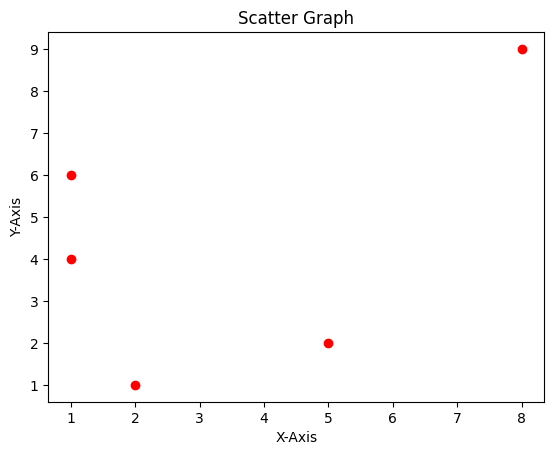

In [491]:
import matplotlib.pyplot as plt
df = pd.DataFrame({"xs":[1,5,2,8,1], "ys":[4,2,1,9,6]})
x,y = df["xs"], df["ys"]
plt.scatter(x,y,color="red")
plt.xlabel("X-Axis")
plt.ylabel("Y-Axis")
plt.title("Scatter Graph")
plt.show()

**57.** Columns in your DataFrame can also be used to modify colors and sizes.  Bill has been keeping track of his performance at work over time, as well as how good he was feeling that day, and whether he had a cup of coffee in the morning.  Make a plot which incorporates all four features of this DataFrame.

(Hint:  If you're having trouble seeing the plot, try multiplying the Series which you choose to represent size by 10 or more)

*The chart doesn't have to be pretty: this isn't a course in data viz!*

```
df = pd.DataFrame({"productivity":[5,2,3,1,4,5,6,7,8,3,4,8,9],
                   "hours_in"    :[1,9,6,5,3,9,2,9,1,7,4,2,2],
                   "happiness"   :[2,1,3,2,3,1,2,3,1,2,2,1,3],
                   "caffienated" :[0,0,1,1,0,0,0,0,1,1,0,1,0]})
```

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]


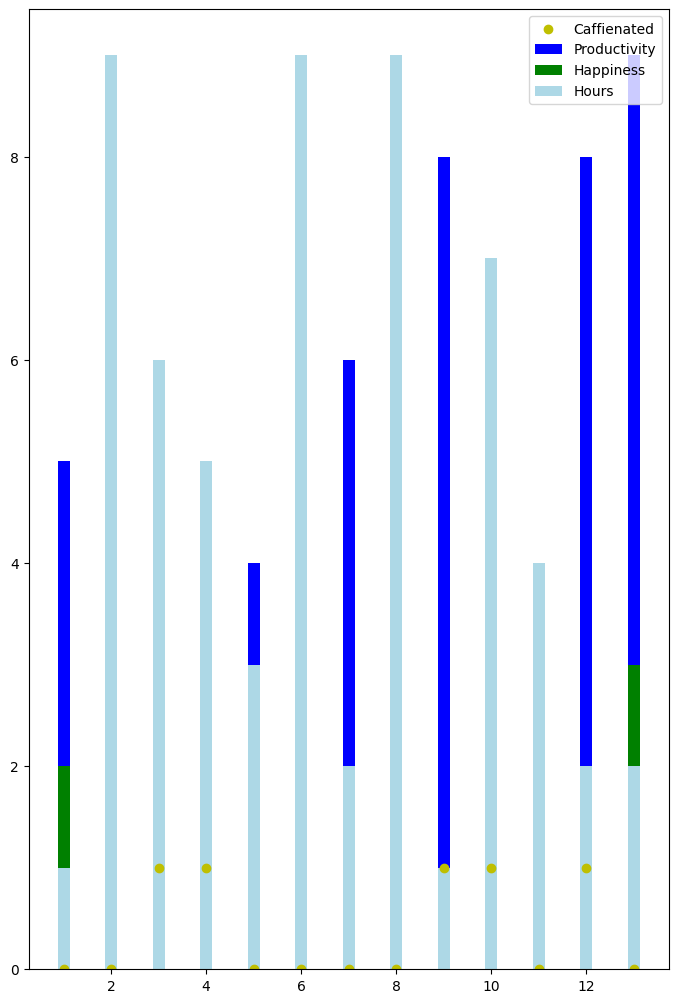

In [504]:
df = pd.DataFrame({"productivity":[5,2,3,1,4,5,6,7,8,3,4,8,9],
                   "hours_in"    :[1,9,6,5,3,9,2,9,1,7,4,2,2],
                   "happiness"   :[2,1,3,2,3,1,2,3,1,2,2,1,3],
                   "caffienated" :[0,0,1,1,0,0,0,0,1,1,0,1,0]})
days = [i+1 for i in range(len(df))]
print(days)
fig = plt.figure()
ax = fig.add_axes([0,0,1,2])
ax.bar(days, df['productivity'], color = 'b', width = 0.25, label='Productivity')
ax.bar(days, df['happiness'], color = 'g', width = 0.25, label='Happiness')
ax.bar(days, df['hours_in'], color = 'lightblue', width = 0.25, label='Hours')
ax.scatter(days , df['caffienated'] , color = 'y', label='Caffienated')

plt.legend()


**58.**  What if we want to plot multiple things?  Pandas allows you to pass in a matplotlib *Axis* object for plots, and plots will also return an Axis object.

Make a bar plot of monthly revenue with a line plot of monthly advertising spending (numbers in millions)

```
df = pd.DataFrame({"revenue":[57,68,63,71,72,90,80,62,59,51,47,52],
                   "advertising":[2.1,1.9,2.7,3.0,3.6,3.2,2.7,2.4,1.8,1.6,1.3,1.9],
                   "month":range(12)
                  })
```

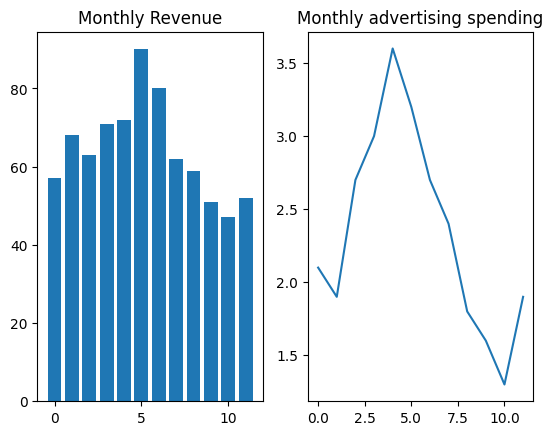

In [516]:
df = pd.DataFrame({"revenue":[57,68,63,71,72,90,80,62,59,51,47,52],
                   "advertising":[2.1,1.9,2.7,3.0,3.6,3.2,2.7,2.4,1.8,1.6,1.3,1.9],
                   "month":range(12)
                  })

X,Y1,Y2 = df['month'], df['revenue'], df['advertising']
figure, axis = plt.subplots(1, 2)


axis[0].bar(X, Y1)
axis[0].set_title("Monthly Revenue")


axis[1].plot(X, Y2)
axis[1].set_title("Monthly advertising spending")

plt.show()

**59.** Generate a day's worth of random stock data, and aggregate / reformat it so that it has hourly summaries of the opening, highest, lowest, and closing prices

**60.** Now that you have your properly-formatted data, try to plot it yourself as a candlestick chart.  Use the ```plot_candlestick(df)``` function above, or matplotlib's [```plot``` documentation](https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.plot.html) if you get stuck.

*More exercises to follow soon...*